# 0.) Import and Clean data

In [89]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [71]:
#drive.mount('/content/gdrive/', force_remount = True)

In [7]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [10]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [11]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

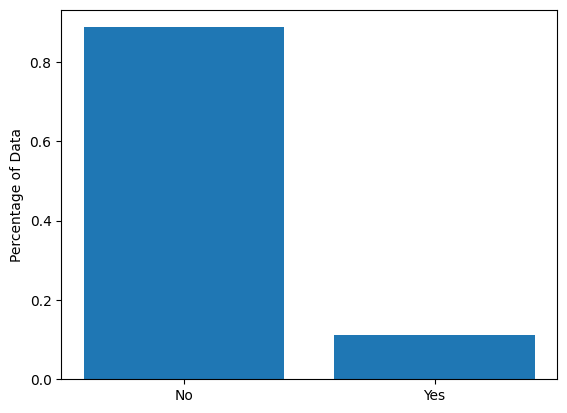

In [12]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [72]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [73]:
###############
###TRANSFORM###
###############

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [74]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.192\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.286\nsamples = 19254\nvalue = [15925, 3329]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= -0.071\ngini = 0.112\nsamples = 10489\nvalue = [9867, 622]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.092\nsamples = 10275\nvalue = [9776, 499]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.489\nsamples = 214\nvalue = [91, 123]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.427\nsamples = 8765\nvalue = [6058, 2707]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 6364\nvalue = [3741, 2623]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.068\nsamples = 2401\nvalue = [2317, 84]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.422\nsamples = 31906\nvalue = [9655, 22251]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.708\ngini = 0.343\nsamples = 26110\nvalue = [5749, 20361]\nclass

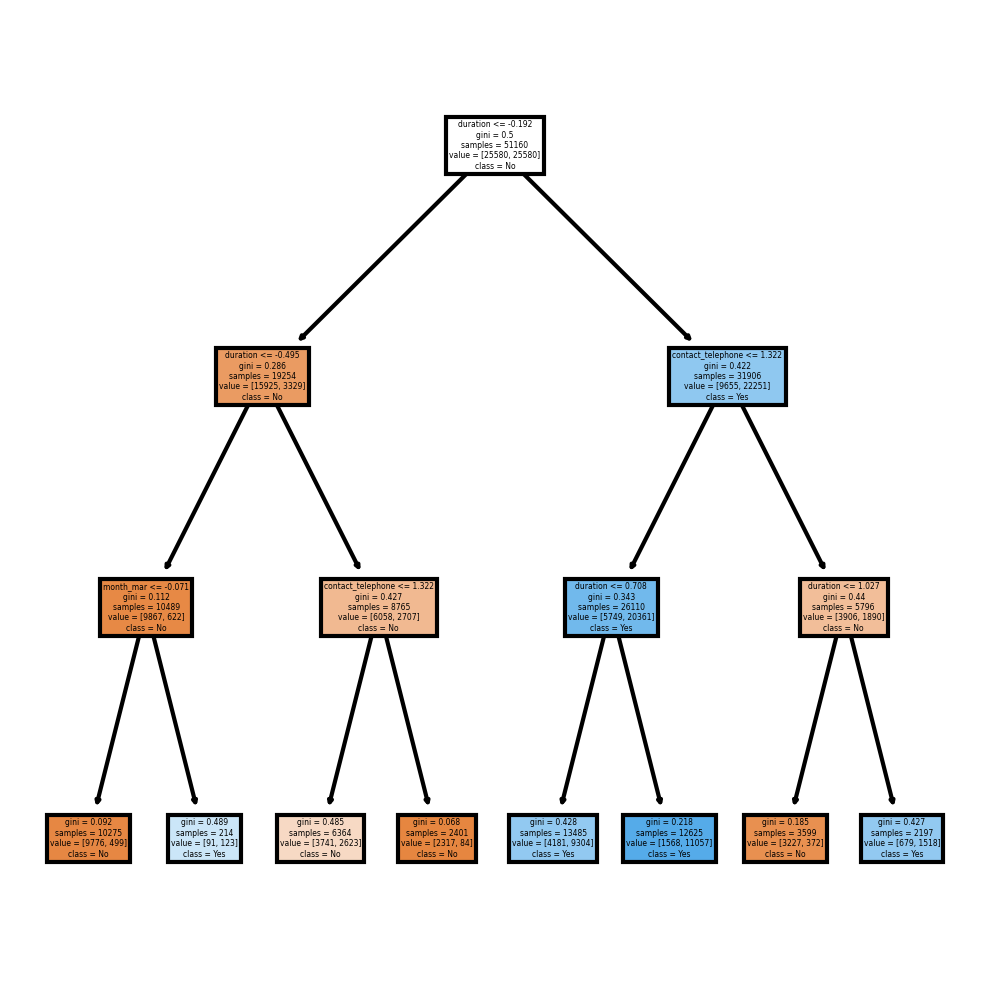

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [76]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

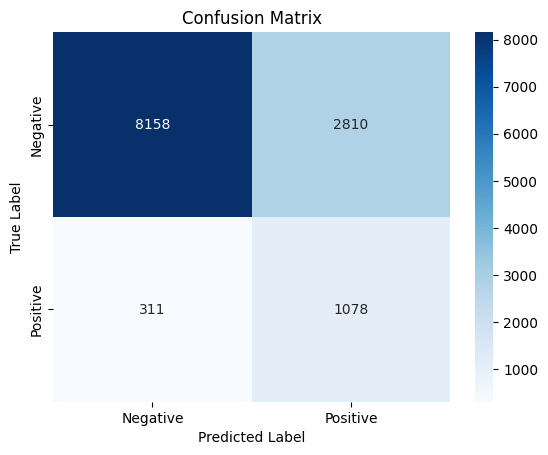

In [77]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [78]:
# Optimize on Max Depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [79]:
bagging = BaggingClassifier(estimator = dtree, n_estimators = 100, max_samples = .5, max_features = 1.)
bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

/Users/echoxyliu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

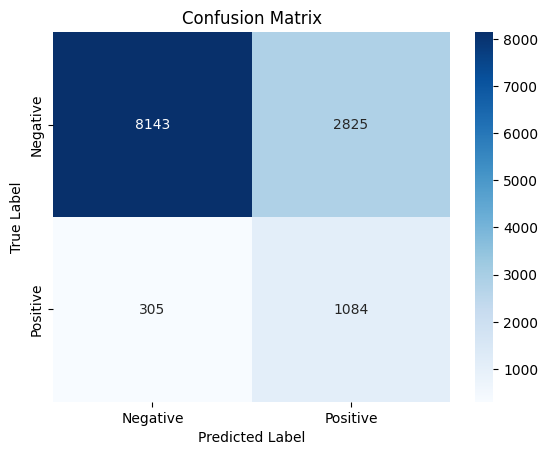

In [81]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
dtree = DecisionTreeClassifier(max_depth = 3)

boost = AdaBoostClassifier(estimator = dtree, n_estimators = 50)
boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

/Users/echoxyliu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


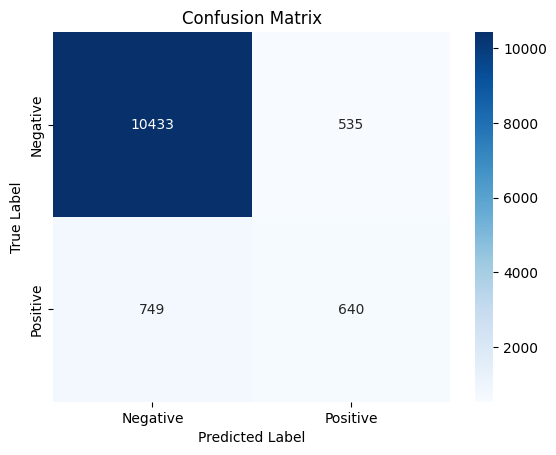

In [84]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a logistic regression on the decision tree, boosted tree, bagged tree, interpret coef and significance

In [36]:
# pip install mlens
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from mlens.ensemble import SuperLearner

In [52]:
from sklearn.linear_model import LogisticRegression

In [85]:
predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)]

x_base_learners = np.column_stack(predictions)

In [86]:
super_learner = LogisticRegression()

In [87]:
super_learner.fit(x_base_learners, y_train)

/Users/echoxyliu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [88]:
super_learner.coef_

array([[1.17320405, 5.01465261, 0.27362609]])

## Findings
Looking at confusion matrix, the boost model performs the best, since it correctly classifies the most labels. This is proved by the coefficient. The coefficient of boost model is 5.01, which is the largest among the three coefficients. This means that the boost model best contributes to successful predictions of the meta model.